# Cross-Domain Power Analysis Attacks - Paper Figures Notebook #1

This notebook was used in building figures from the paper itself. It has been modified to point to the public trace and result repository instead of local disk.

This mostly deals with pre-recorded results. A part of the paper complete attack results (i.e., CPA over time) have been made available, which can be used to perform other plotting methods. In general the results have been saved with high granularity to allow further re-use.

For example the CPA attack results include all time points (not just the targetted ones) during the progression of the attack.

Exact figures as created in the paper can be built from this notebook.

# Plotting CW-Lite Captured Traces & Results

The following plot does some basic plots of data captured using the ChipWhisperer-Lite and an external shunt resistor.

In [0]:
#Run following cell to download power trace plot
!wget https://powertraces.sfo2.digitaloceanspaces.com/saml11_paper/saml11/cwlite/cwlite_ext_500k_key0_randtext_data/traces/2019.01.06-08.53.24_traces.npy

In [0]:
import numpy as np

#For "cloud" version we just downloaded the one file of interest using above
prefix = ""

#For "local" version (not cloud) we have full copy of data so need prefix
#prefix = r"/traces/saml11/cwlite/cwlite_ext_500k_key0_randtext_data/traces/

trace_cwlite = np.load(prefix + "2019.01.06-08.53.24_traces.npy")
avg_cwlite = np.mean(trace_cwlite, axis=0)

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


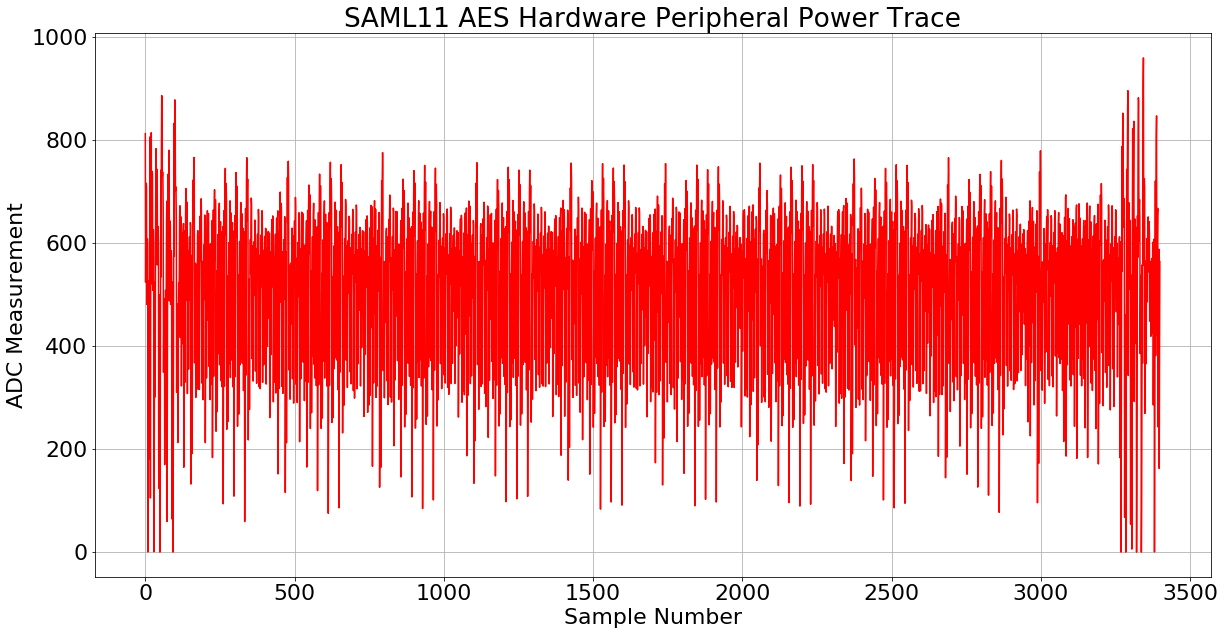

In [3]:
import matplotlib
import matplotlib.pyplot as plt

font = {'family' : 'normal',
        'size'   : 22}

matplotlib.rc('font', **font)

plt.figure(figsize=(20,10))
plt.plot(avg_cwlite * 1024 + 512, 'r')
plt.ylabel('ADC Measurement')
plt.xlabel('Sample Number')
plt.grid(True)
plt.title('SAML11 AES Hardware Peripheral Power Trace')
plt.savefig('saml11_power_trace.eps', format='eps', dpi=1000)
plt.show()

In [13]:
#Warning - these files are huge! Each one is ~166M, so you can quickly max out colab
!wget https://powertraces.sfo2.digitaloceanspaces.com/saml11_paper/results/cwlite_ext_1_1_results_{0..15}.pickle
          

--2019-05-23 18:54:53--  https://powertraces.sfo2.digitaloceanspaces.com/saml11_paper/results/cwlite_ext_1_1_results_0.pickle
Resolving powertraces.sfo2.digitaloceanspaces.com (powertraces.sfo2.digitaloceanspaces.com)... 138.68.32.225
Connecting to powertraces.sfo2.digitaloceanspaces.com (powertraces.sfo2.digitaloceanspaces.com)|138.68.32.225|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 174081290 (166M) [application/octet-stream]
Saving to: ‘cwlite_ext_1_1_results_0.pickle.3’

cwlite_ext_1_1_resu 100%[===================>] 166.02M   127MB/s    in 1.3s    

2019-05-23 18:54:55 (127 MB/s) - ‘cwlite_ext_1_1_results_0.pickle.3’ saved [174081290/174081290]

--2019-05-23 18:54:55--  https://powertraces.sfo2.digitaloceanspaces.com/saml11_paper/results/cwlite_ext_1_1_results_1.pickle
Reusing existing connection to powertraces.sfo2.digitaloceanspaces.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 174081290 (166M) [application/octet-stream]
Saving to

In [7]:
import pickle

prefix = ""

#prefix = r"/home/newae/saml11/

results = []
for bnum in range(0, 16):
    print("Loading data for subkey %d"%bnum)
    results.append(pickle.load(open(prefix + "cwlite_ext_1_1_results_%d.pickle"%bnum, "rb")))

print("Success - thanks for the RAM!")

Loading data for subkey 0
Loading data for subkey 1
Loading data for subkey 2
Loading data for subkey 3
Loading data for subkey 4
Loading data for subkey 5
Loading data for subkey 6
Loading data for subkey 7
Loading data for subkey 8
Loading data for subkey 9
Loading data for subkey 10
Loading data for subkey 11
Loading data for subkey 12
Loading data for subkey 13
Loading data for subkey 14
Loading data for subkey 15
Success - thanks for the RAM!


In [8]:
#The following little block can be useful when monitoring what various blocks are doing...
import psutil
psutil.virtual_memory()

svmem(total=13655314432, available=9909108736, percent=27.4, used=3467767808, free=249257984, active=3544260608, inactive=9386467328, buffers=71323648, cached=9866964992, shared=884736, slab=367300608)

In [0]:
#We specify the last-round key, because that is the one that we are actually breaking. In this case we have
#rolled the 1-st round key into the last-round key:
known_key = [0xd0, 0x14, 0xf9, 0xa8, 0xc9, 0xee, 0x25, 0x89, 0xe1, 0x3f, 0x0c, 0xc8, 0xb6, 0x63, 0x0c, 0xa6]

#You can specify to use less than the full trace load. By default we use the full results.
traces_to_use = -1
if traces_to_use == -1:
    traces_to_use = max(results[5]['cpa_05'].keys())
       

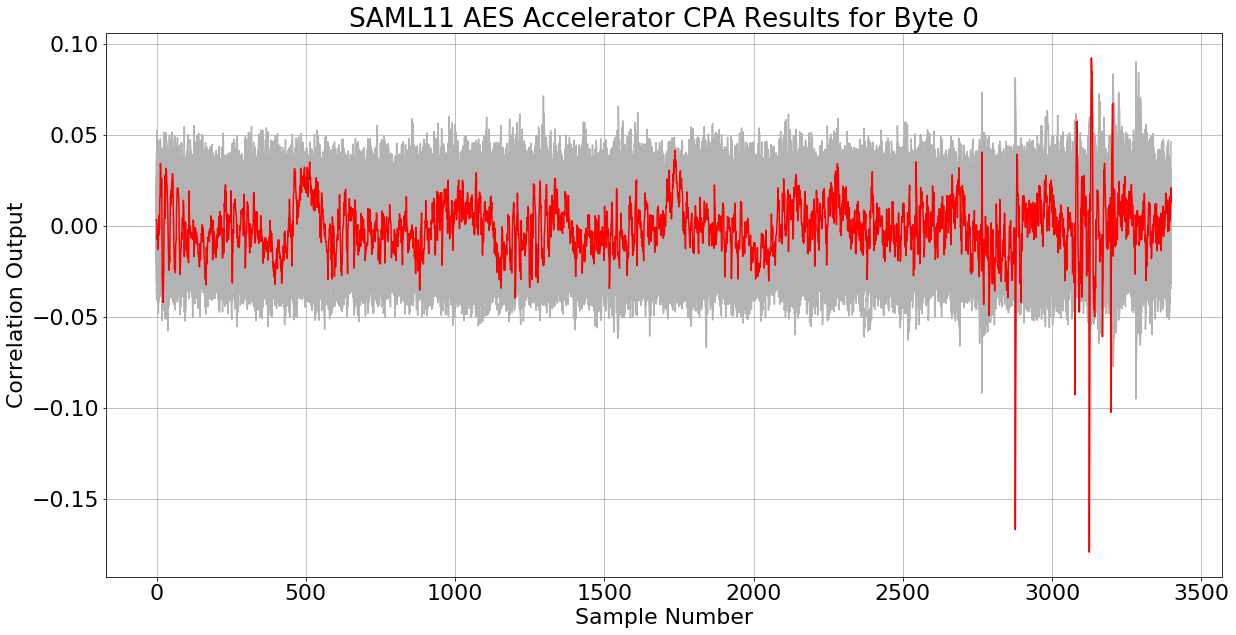

In [11]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx

font = {'family' : 'normal',
        'size'   : 22}

matplotlib.rc('font', **font)

ps = 0
pe = 3400

bnum = 0

xrng = [i for i in range(ps, pe)]

plt.figure(figsize=(20,10))

for i in range(0, 256):
    if bnum != known_key[bnum]:
        plt.plot(xrng, results[bnum]['cpa_%02d'%bnum][traces_to_use][i][ps:pe], color=(0.7,0.7,0.7)) 

plt.plot(xrng, results[bnum]['cpa_%02d'%bnum][traces_to_use][known_key[bnum]][ps:pe], color='r', label="%d"%bnum)

plt.ylabel('Correlation Output')
plt.xlabel('Sample Number')
plt.grid(True)
plt.title('SAML11 AES Accelerator CPA Results for Byte %d'%bnum)
plt.savefig("saml11_cpa_byte0.eps", format='eps', dpi=1000, bbox_inches='tight')
plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


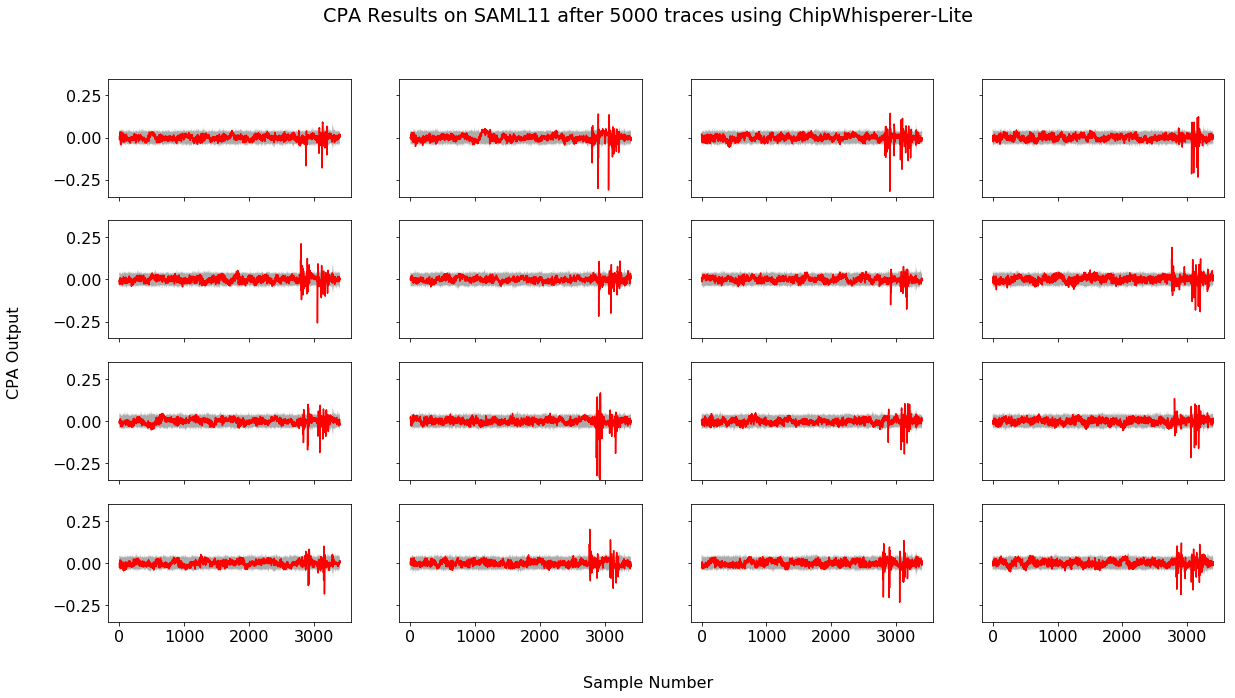

In [12]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
import numpy as np

font = {'family' : 'normal',
        'size'   : 16}

matplotlib.rc('font', **font)

ps = 0
pe = 3400

bnum = 0

xrng = [i for i in range(ps, pe)]

# Four axes, returned as a 2-d array
f, axarr = plt.subplots(4, 4, figsize=(20,10), sharex='col', sharey='row')

n = 0
m = 0

for bnum in range(0, 16):
    buse = []
    for i in range(0, 256):
        if bnum != known_key[bnum]:
            #axarr[n, m].plot(xrng, results[bnum]['cpa_%02d'%bnum][traces_to_use][i][ps:pe], color=(0.7,0.7,0.7)) 
            buse.append(i)
    ymax = np.amax( results[bnum]['cpa_%02d'%bnum][traces_to_use][buse][ps:pe], axis=0)
    ymin = np.amin( results[bnum]['cpa_%02d'%bnum][traces_to_use][buse][ps:pe], axis=0)
    axarr[n, m].fill_between(xrng, ymax, ymin, facecolor=(0.67, 0.67, 0.67))

    axarr[n, m].plot(xrng, results[bnum]['cpa_%02d'%bnum][traces_to_use][known_key[bnum]][ps:pe], color='r', label="%d"%bnum)

    axarr[n, m].set_ylim([-0.35, 0.35])
    
    n = n + 1
    if n > 3:
        n = 0
        m = m + 1

plt.setp([a.get_xticklabels() for a in axarr[0, :]], visible=False)
plt.setp([a.get_yticklabels() for a in axarr[:, 1]], visible=False)
plt.suptitle("CPA Results on SAML11 after 5000 traces using ChipWhisperer-Lite")
f.text(0.5, 0.04, 'Sample Number', ha='center', va='center')
f.text(0.06, 0.5, 'CPA Output', ha='center', va='center', rotation='vertical')
plt.savefig('saml11_cpa_results.eps', format='eps', dpi=1000)
plt.show()

In [0]:
plt.savefig('saml11_cpa_results.eps', format='eps', dpi=1000)

<Figure size 432x288 with 0 Axes>

## Plotting PGE from Development Kit Attack (Using On-Board ADC to Self-Attack)

In [0]:
import importlib
import sys
#import chipwhisperer as cw
import numpy as np
from tqdm import tqdm, trange
import pickle
import numpy as np

def generate_pge(basename, known_key=None, ps_array=None, pe_array=None, debug=False):
    
    if known_key is None:
        known_key = [0xd0, 0x14, 0xf9, 0xa8, 0xc9, 0xee, 0x25, 0x89, 0xe1, 0x3f, 0x0c, 0xc8, 0xb6, 0x63, 0x0c, 0xa6]

    if ps_array is None:
        ps_array = [0]*16
    
    if pe_array is None:
        pe_array = [0]*16

    pge_results = []

    trace_count_list = []
    last_result = []

    for d in range (0, 16):
        trace_count_list.append([])
        filename=basename + "_results_" + str(d) + ".pickle"
        print("Byte{}: Loading from {}".format(d, filename))
        results = pickle.load(open(filename, "rb"))

        num_datapoints = len(results['cpa_%02d'%(d)].keys())

        temp_results = results['cpa_%02d'%(d)]

        last_result.append(temp_results[max(temp_results.keys())])

        ps = ps_array[d]
        pe = pe_array[d]
        pge_array = []

        for j, index in enumerate(temp_results.keys()):            
            pge_array.append(np.where(np.argsort(np.max(np.abs(temp_results[index][:,ps:pe]), axis=1))[::-1] == known_key[d])[0][0])

        for index in temp_results.keys():  
            trace_count_list[d].append(index) 

        pge_results.append(pge_array) 
    

    rv = {}
    rv['pge'] = pge_results
    rv['trace_cnt'] = trace_count_list[0]
    rv['last_cpa_result'] = last_result
    
    return rv
   
#np.save(setting_mod.prefix_batch + "_avgpge.npy", pge_results)
#np.save(setting_mod.prefix_batch + "_avgpge_tracecnt.npy", trace_count_list)
    

In [14]:
#WARNING - each of these is 470MB, you are about to download 470MB x 16 bytes
!wget https://powertraces.sfo2.digitaloceanspaces.com/saml11_paper/results/no_shunt_extended__results_{0..15}.pickle

--2019-05-23 18:56:33--  https://powertraces.sfo2.digitaloceanspaces.com/saml11_paper/results/no_shunt_extended__results_0.pickle
Resolving powertraces.sfo2.digitaloceanspaces.com (powertraces.sfo2.digitaloceanspaces.com)... 138.68.32.225
Connecting to powertraces.sfo2.digitaloceanspaces.com (powertraces.sfo2.digitaloceanspaces.com)|138.68.32.225|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 493079445 (470M) [application/octet-stream]
Saving to: ‘no_shunt_extended__results_0.pickle’

no_shunt_extended__ 100%[===================>] 470.24M   117MB/s    in 4.1s    

2019-05-23 18:56:37 (114 MB/s) - ‘no_shunt_extended__results_0.pickle’ saved [493079445/493079445]

--2019-05-23 18:56:37--  https://powertraces.sfo2.digitaloceanspaces.com/saml11_paper/results/no_shunt_extended__results_1.pickle
Reusing existing connection to powertraces.sfo2.digitaloceanspaces.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 493079445 (470M) [application/octet-strea

In [18]:
#Linear regulator attack
ps_array = [5]*16
pe_array = [7]*16
ps_array[3] = 6
pe_array[9] = 6
pe_array[12] = 6
pe_array[14] = 6
pge_linear_devkit = generate_pge("no_shunt_extended_", ps_array=ps_array, pe_array=pe_array)

Byte0: Loading from no_shunt_extended__results_0.pickle
Byte1: Loading from no_shunt_extended__results_1.pickle
Byte2: Loading from no_shunt_extended__results_2.pickle
Byte3: Loading from no_shunt_extended__results_3.pickle
Byte4: Loading from no_shunt_extended__results_4.pickle
Byte5: Loading from no_shunt_extended__results_5.pickle
Byte6: Loading from no_shunt_extended__results_6.pickle
Byte7: Loading from no_shunt_extended__results_7.pickle
Byte8: Loading from no_shunt_extended__results_8.pickle
Byte9: Loading from no_shunt_extended__results_9.pickle
Byte10: Loading from no_shunt_extended__results_10.pickle
Byte11: Loading from no_shunt_extended__results_11.pickle
Byte12: Loading from no_shunt_extended__results_12.pickle
Byte13: Loading from no_shunt_extended__results_13.pickle
Byte14: Loading from no_shunt_extended__results_14.pickle
Byte15: Loading from no_shunt_extended__results_15.pickle


Byte0: Loading from saml11/no_shunt_switching_hpf25__results_0.pickle
Byte1: Loading from saml11/no_shunt_switching_hpf25__results_1.pickle
Byte2: Loading from saml11/no_shunt_switching_hpf25__results_2.pickle
Byte3: Loading from saml11/no_shunt_switching_hpf25__results_3.pickle
Byte4: Loading from saml11/no_shunt_switching_hpf25__results_4.pickle
Byte5: Loading from saml11/no_shunt_switching_hpf25__results_5.pickle
Byte6: Loading from saml11/no_shunt_switching_hpf25__results_6.pickle
Byte7: Loading from saml11/no_shunt_switching_hpf25__results_7.pickle
Byte8: Loading from saml11/no_shunt_switching_hpf25__results_8.pickle
Byte9: Loading from saml11/no_shunt_switching_hpf25__results_9.pickle
Byte10: Loading from saml11/no_shunt_switching_hpf25__results_10.pickle
Byte11: Loading from saml11/no_shunt_switching_hpf25__results_11.pickle
Byte12: Loading from saml11/no_shunt_switching_hpf25__results_12.pickle
Byte13: Loading from saml11/no_shunt_switching_hpf25__results_13.pickle
Byte14: Load

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import EngFormatter

def plot_pge(resp, title="Unknown Attack", start=0, end=-1, showavg=True, xticks=None, filename=None):
    fig = plt.figure(figsize=(20,10))
    for i in range(0,16):
        plt.plot(resp['trace_cnt'][start:end], resp['pge'][i][start:end], label='%d'%i, alpha=0.5)
    
    if showavg:
        plt.plot(resp['trace_cnt'][start:end], np.mean(resp['pge'], axis=0)[start:end], 'r', alpha=1, label="avg")
    plt.legend()
    plt.xlabel("Number of Traces")
    plt.ylabel("Partial Guessing Entropy")
    plt.title(title)
    if filename:
        plt.savefig(filename, format='eps', dpi=1000, bbox_inches='tight')
    plt.show()

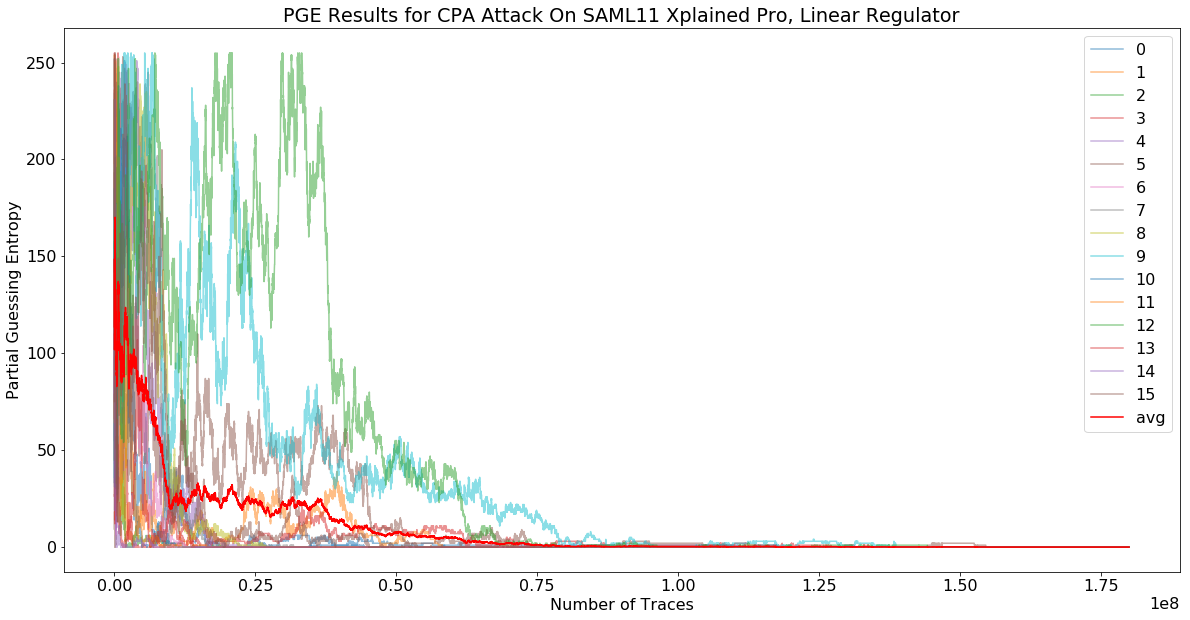

In [20]:
#PGE becomes mostly stable to 0 for ALL bytes after 160E6 traces, make graph nicer by reducing wasted plot
plot_pge(pge_linear_devkit, "PGE Results for CPA Attack On SAML11 Xplained Pro, Linear Regulator", start=0,end=18000,showavg=True, filename="pge_saml11xp_lin.eps")

In [0]:
#Switching regulator output - not yet successful so not tuned
ps_array = [5]*16
pe_array = [10]*16
pge_switching_devkit = generate_pge("saml11/no_shunt_switching_hpf25_", ps_array=ps_array, pe_array=pe_array)

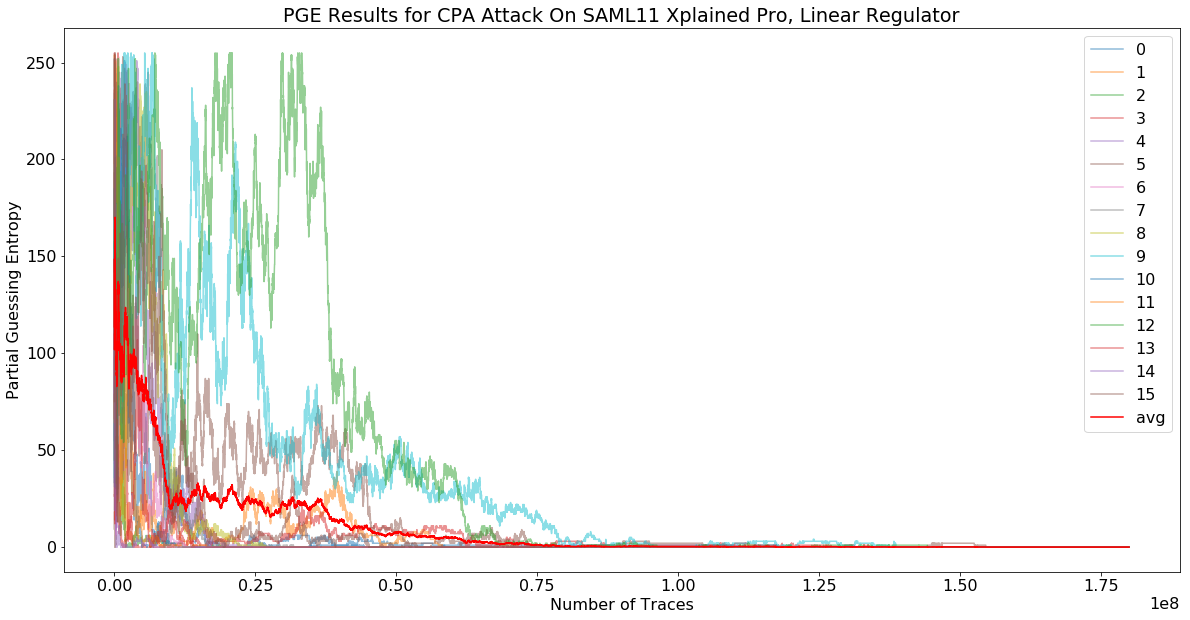

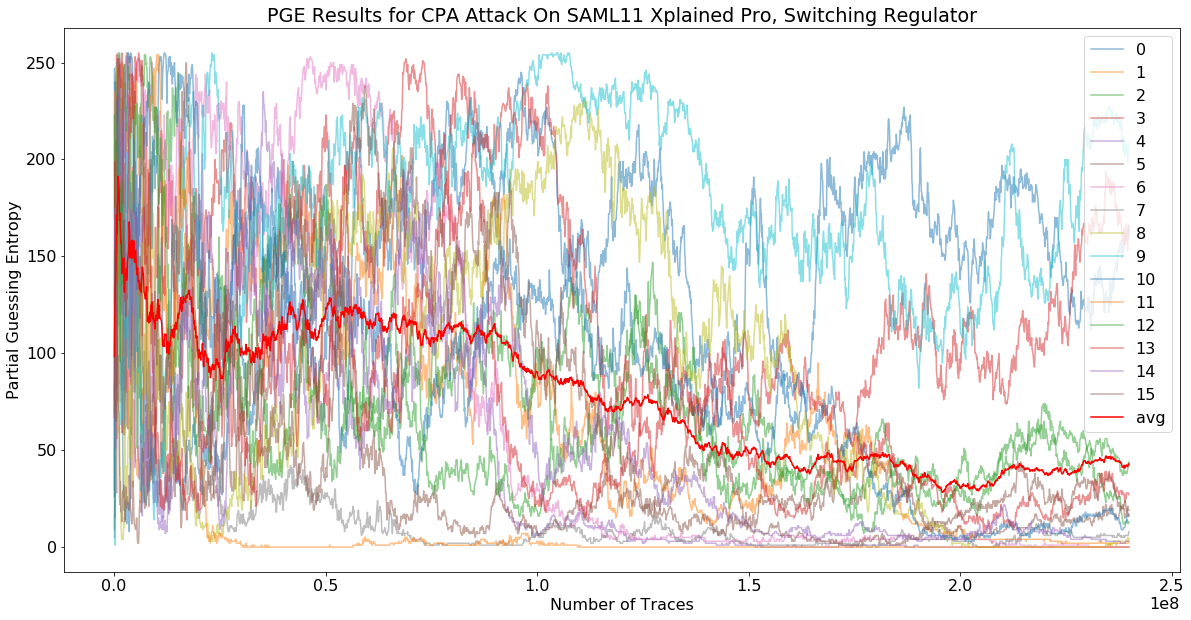

In [0]:
plot_pge(pge_switching_devkit, "PGE Results for CPA Attack On SAML11 Xplained Pro, Switching Regulator", filename="pge_saml11xp_sw.eps")

In [0]:
last_result = boardb_shunt['last_cpa_result']
point_num = []
for bnum in range(0, 16):
    loc = np.where(np.argsort(np.abs(last_result[bnum]), axis=0)[::-1] == known_key[bnum])
    #print(loc)
    print("{}: {}".format(bnum, loc[1][np.where(loc[0] == 0)]))
    #print(loc[1][np.where(loc[0] < 20)])
    point_num.append(loc[1][0])

0: [3 4 5 6]
1: [2 3 4 5 6]
2: [5 6]
3: [3 4 5]
4: [2 5 6]
5: [3 4 6]
6: [3 4 5 6]
7: [2 3 4 5 6 7 8 9]
8: [3]
9: [3 4 5 6]
10: [6]
11: [2 3 4 5 6]
12: [3 4 5 6]
13: [2 3 4 5 6 7 8 9]
14: [2 3 4 5]
15: [5]


## BoardB Plotting PGE (On-Board ADC, but shunt in VCC-INT to increase success rate)

In [0]:
!wget https://powertraces.sfo2.digitaloceanspaces.com/saml11_paper/results/boardb_shunt__results_{0..15}.pickle

Byte0: Loading from boardb_shunt__results_0.pickle
Byte1: Loading from boardb_shunt__results_1.pickle
Byte2: Loading from boardb_shunt__results_2.pickle
Byte3: Loading from boardb_shunt__results_3.pickle
Byte4: Loading from boardb_shunt__results_4.pickle
Byte5: Loading from boardb_shunt__results_5.pickle
Byte6: Loading from boardb_shunt__results_6.pickle
Byte7: Loading from boardb_shunt__results_7.pickle
Byte8: Loading from boardb_shunt__results_8.pickle
Byte9: Loading from boardb_shunt__results_9.pickle
Byte10: Loading from boardb_shunt__results_10.pickle
Byte11: Loading from boardb_shunt__results_11.pickle
Byte12: Loading from boardb_shunt__results_12.pickle
Byte13: Loading from boardb_shunt__results_13.pickle
Byte14: Loading from boardb_shunt__results_14.pickle
Byte15: Loading from boardb_shunt__results_15.pickle


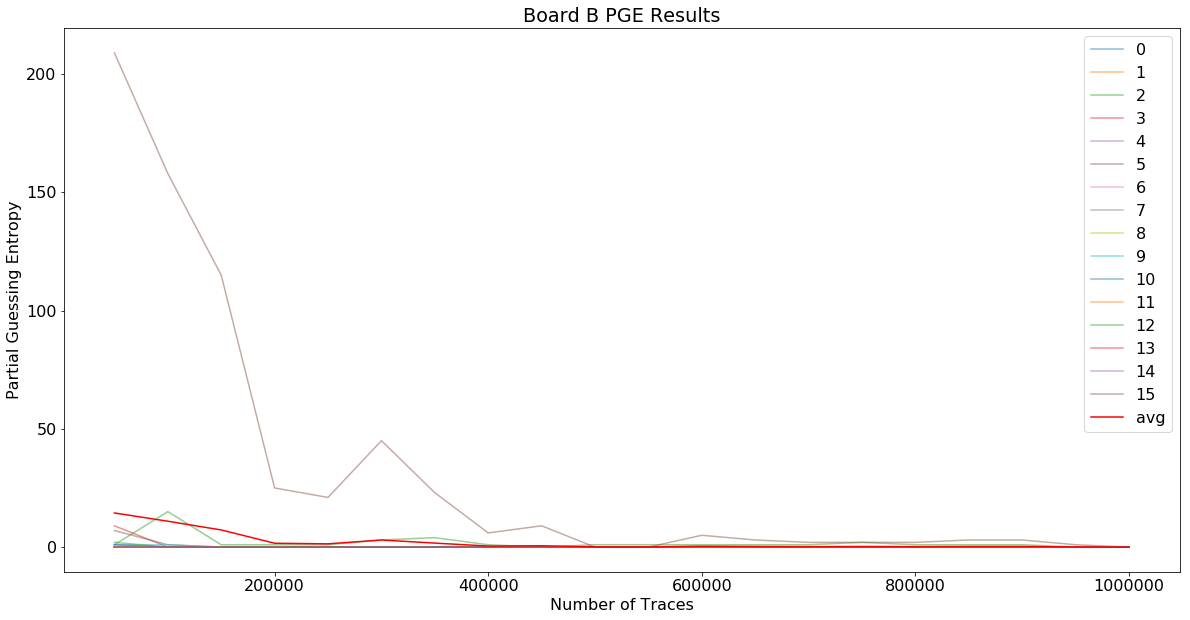

In [23]:
#Basic range of where AES is happening
ps_array = [3, 3, 5, 3, 5, 3, 3, 3, 3, 3, 6, 3, 3, 3, 3, 5]
pe_array = [6, 6, 7, 6, 7, 5, 7, 7, 4, 7, 7, 7, 7, 7, 6, 6]

boardb_shunt = generate_pge("boardb_shunt_", ps_array=ps_array, pe_array=pe_array)
plot_pge(boardb_shunt, "Board B PGE Results", start=0,end=20)

## TVLA Testing

In [24]:
#Run following cell to download power trace plot
!wget https://powertraces.sfo2.digitaloceanspaces.com/saml11_paper/saml11/testboards/boardevk_tvla_switching_shunt_trace_array_0.npy
!wget https://powertraces.sfo2.digitaloceanspaces.com/saml11_paper/saml11/testboards/boardevk_tvla_switching_shunt_group_array_0.npy
!wget https://powertraces.sfo2.digitaloceanspaces.com/saml11_paper/saml11/testboards/boardevk_tvla_shunt_trace_array_0.npy
!wget https://powertraces.sfo2.digitaloceanspaces.com/saml11_paper/saml11/testboards/boardevk_tvla_shunt_group_array_0.npy

--2019-05-23 19:13:28--  https://powertraces.sfo2.digitaloceanspaces.com/saml11_paper/saml11/testboards/boardevk_tvla_switching_shunt_trace_array_0.npy
Resolving powertraces.sfo2.digitaloceanspaces.com (powertraces.sfo2.digitaloceanspaces.com)... 138.68.32.225
Connecting to powertraces.sfo2.digitaloceanspaces.com (powertraces.sfo2.digitaloceanspaces.com)|138.68.32.225|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 201600128 (192M) [application/octet-stream]
Saving to: ‘boardevk_tvla_switching_shunt_trace_array_0.npy’

boardevk_tvla_switc 100%[===================>] 192.26M   115MB/s    in 1.7s    

2019-05-23 19:13:30 (115 MB/s) - ‘boardevk_tvla_switching_shunt_trace_array_0.npy’ saved [201600128/201600128]

--2019-05-23 19:13:30--  https://powertraces.sfo2.digitaloceanspaces.com/saml11_paper/saml11/testboards/boardevk_tvla_switching_shunt_group_array_0.npy
Resolving powertraces.sfo2.digitaloceanspaces.com (powertraces.sfo2.digitaloceanspaces.com)... 138.68.32

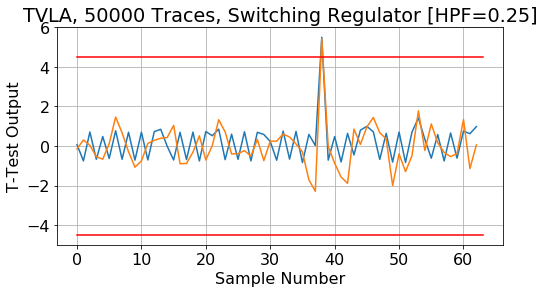

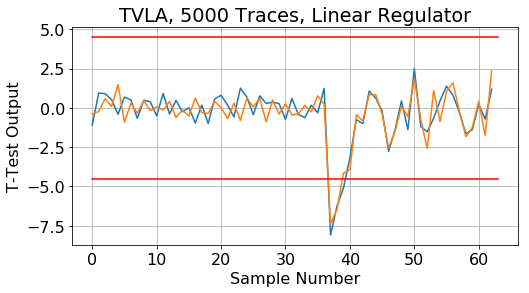

In [25]:
import matplotlib
font = {'family' : 'normal',
        'size'   : 16}
matplotlib.rc('font', **font)
from matplotlib.pylab import *
import numpy as np
import scipy
import scipy.stats
from scipy import signal
 
  
#prefix = r"traces/saml11/testboards/"
prefix = ""
  
  
def do_the_ttvla(traces, groups, ntraces=-1, filtered=False):
    if ntraces == -1:
        ntraces = len(traces)/2
       
    if ntraces * 2 > len(traces):
        raise ValueError("Invalid ntraces")
       
    #Hack for now - just turn on or off this filter with a flag, eventually move
    #this out of the TTVLA routine
    sos = signal.butter(5, 0.25, "highpass", output="sos")  
       
    for g in range(0, 2):
        group = groups[g*ntraces:(g*ntraces+ntraces)]
        trace = traces[g*ntraces:(g*ntraces+ntraces),:]
       
        if filtered:
            trace = signal.sosfilt(sos, trace)
               
        trace = welch_ttest(group, trace)
        plot(trace)
       
    plot([0, len(traces[0])], [-4.5, -4.5], 'r')
    plot([0, len(traces[0])], [4.5, 4.5], 'r')
 
def welch_ttest(group, traces):
    # Compute Welch's t-statistic at each point in time
    # Here, group[] must only contain booleans (True/False)
    traces_true = traces[np.where(np.array(group))]
    traces_false = traces[np.where(~np.array(group))]
   
    if len(traces_true) == 0:
        traces_true  = np.array([[np.nan for _ in range(len(traces[0]))]])
    if len(traces_false) == 0:
        traces_false = np.array([[np.nan for _ in range(len(traces[0]))]])
   
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        ttrace = scipy.stats.ttest_ind(traces_true, traces_false, axis=0, equal_var=False)[0]
       
    return np.nan_to_num(ttrace)
   
figure(figsize=(8, 4))
trace_array = np.load(prefix + "boardevk_tvla_switching_shunt_trace_array_{}.npy".format(0))
group_array = np.load(prefix + "boardevk_tvla_switching_shunt_group_array_{}.npy".format(0))
do_the_ttvla(trace_array, group_array, 50000, True)
title("TVLA, 50000 Traces, Switching Regulator [HPF=0.25]")
xlabel("Sample Number")
ylabel("T-Test Output")
grid()
savefig("tva_evk_switching.eps", format='eps', dpi=1000, bbox_inches='tight')

 
trace_array = np.load(prefix + "boardevk_tvla_shunt_trace_array_{}.npy".format(0))
group_array = np.load(prefix + "boardevk_tvla_shunt_group_array_{}.npy".format(0))
figure(figsize=(8, 4))
do_the_ttvla(trace_array, group_array, 5000)
title("TVLA, 5000 Traces, Linear Regulator")
xlabel("Sample Number")
ylabel("T-Test Output")
grid()
savefig("tvla_evk_linear.eps", format='eps', dpi=1000, bbox_inches='tight')
show()

## Plotting Switching Supply

In [26]:
!wget https://powertraces.sfo2.digitaloceanspaces.com/saml11_paper/saml11/testboards/boardevk_tvla_switching_shunt_trace_array_0.npy

--2019-05-23 19:14:31--  https://powertraces.sfo2.digitaloceanspaces.com/saml11_paper/saml11/testboards/boardevk_tvla_switching_shunt_trace_array_0.npy
Resolving powertraces.sfo2.digitaloceanspaces.com (powertraces.sfo2.digitaloceanspaces.com)... 138.68.32.225
Connecting to powertraces.sfo2.digitaloceanspaces.com (powertraces.sfo2.digitaloceanspaces.com)|138.68.32.225|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 201600128 (192M) [application/octet-stream]
Saving to: ‘boardevk_tvla_switching_shunt_trace_array_0.npy.1’

boardevk_tvla_switc 100%[===================>] 192.26M   124MB/s    in 1.5s    

2019-05-23 19:14:33 (124 MB/s) - ‘boardevk_tvla_switching_shunt_trace_array_0.npy.1’ saved [201600128/201600128]



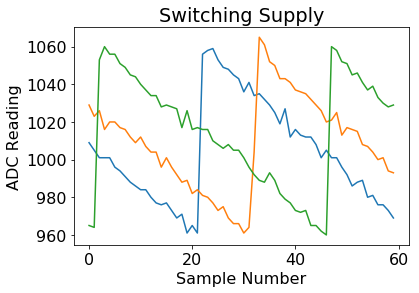

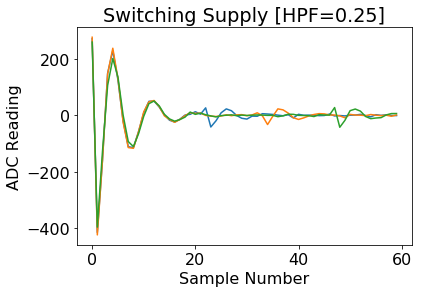

In [27]:
from matplotlib.pylab import *
trace_array = np.load(prefix + "boardevk_tvla_switching_shunt_trace_array_{}.npy".format(0))


plot(trace_array[22,0:60])
plot(trace_array[14,0:60])
plot(trace_array[15,0:60])
title('Switching Supply')
xlabel('Sample Number')
ylabel('ADC Reading')
savefig("smps_raw.eps", format='eps', dpi=1000, bbox_inches='tight')
figure()

sos = signal.butter(5, 0.25, "highpass", output="sos")  
trace = signal.sosfilt(sos, trace_array)

plot(trace[22,0:60])
plot(trace[14,0:60])
plot(trace[15,0:60])
title('Switching Supply [HPF=0.25]')
xlabel('Sample Number')
ylabel('ADC Reading')
savefig("smps_hpf.eps", format='eps', dpi=1000, bbox_inches='tight')